
     RDKit          3D

  1  0  0  0  0  0  0  0  0  0999 V2000
   -5.4510   -3.6742   -0.0096 C   0  0  0  0  0  0  0  0  0  0  0  0
M  END



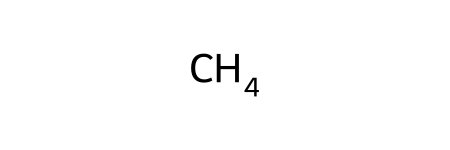

In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Geometry import Point3D

def create_molecule_from_tabular_data(atom_data):
    """
    Create an RDKit molecule with 3D coordinates from tabular data.

    atom_data: list of dictionaries, where each dictionary contains
               atom information and 3D coordinates.
    Example format of atom_data:
        [{'CenterNumber': 1, 'AtomicNumber': 6, 'X': -5.451002, 'Y': -3.674190, 'Z': -0.009636}, ...]
    """
    
    # Create an empty editable molecule
    mol = Chem.RWMol()
    
    # Create a conformer to store 3D coordinates
    conf = Chem.Conformer(len(atom_data))
    
    for atom_info in atom_data:
        # Add atom by atomic number
        atom = Chem.Atom(atom_info['AtomicNumber'])
        idx = mol.AddAtom(atom)  # Add the atom to the molecule and get the index
        
        # Set the 3D coordinates
        pos = Point3D(atom_info['X'], atom_info['Y'], atom_info['Z'])
        conf.SetAtomPosition(idx, pos)
    
    # Add the conformer to the molecule
    mol.AddConformer(conf)
    
    # Optionally, sanitize the molecule to finalize (not necessary for atomic coordinates)
    Chem.SanitizeMol(mol)
    
    return mol

# Example tabular data
atom_data = [
    {'CenterNumber': 1, 'AtomicNumber': 6, 'X': -5.451002, 'Y': -3.674190, 'Z': -0.009636},
    # Add more atoms as needed
]

# Create molecule from the atom data
mol = create_molecule_from_tabular_data(atom_data)

# Optionally, visualize or further manipulate the molecule
print(Chem.MolToMolBlock(mol))  # Prints the MOL block (3D coordinates)
mol